In [1]:
# 提取特征的Demo
# 1.加载VGG16预训练模型
# 2.示例图片提取特征
# 3.保存模型（saved_model）以便后面调用
# 4.将特征提取做成类，方便后面批量提取使用

In [2]:
# 导入相关包
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
from tensorflow import keras
keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

2024-04-30 11:53:18.327837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 11:53:18.470056: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simonwsy/miniconda3/envs/quant/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:
2024-04-30 11:53:18.470077: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-30 11:53:18.495639: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register 

In [4]:
import tensorflow as tf
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [5]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50

In [6]:
import keras.utils.image_utils as image

In [7]:
from keras.applications.vgg16 import preprocess_input

In [8]:
#  include_top：会增加AVG，全连接层
#  使用imagenet预训练模型
#  pooling='avg'将输出变成2048的向量
resnet50 = ResNet50(include_top=False,weights='imagenet',pooling='avg',input_shape=(224,224,3))
# resnet50.summary()

94765736/94765736 [==============================] - 4s 0us/step


In [9]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [10]:
#  include_top：会增加全连接层，输出1000类，我们不需要
#  使用imagenet预训练模型
#  pooling='avg'将输出变成512的向量
vgg16 = VGG16(include_top=False,weights='imagenet',pooling='avg',input_shape=(224,224,3))

58889256/58889256 [==============================] - 3s 0us/step


In [11]:
# vgg16.summary()

In [12]:
# 预处理
def preprocessImage(fileName):
    img = image.load_img(fileName, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img


In [13]:
def extractFeat(model,fileName):
    img = preprocessImage(fileName)
    # 预测
    feat = model.predict(img)
    # L2归一化
    norm_feat = feat[0]/np.linalg.norm(feat[0])
    return norm_feat

In [14]:
test_img = preprocessImage('images/test (1).jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'images/test (1).jpg'

In [ ]:
test_img.max()

151.061

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


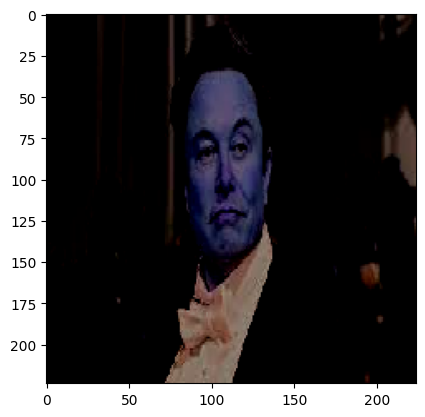

In [ ]:
plt.imshow(test_img.astype("int")[0])

In [ ]:
import glob

In [ ]:
images = glob.glob('./images/*.jpg')

In [ ]:
images

['./images\\test (1).jpg',
 './images\\test (10).jpg',
 './images\\test (11).jpg',
 './images\\test (12).jpg',
 './images\\test (13).jpg',
 './images\\test (14).jpg',
 './images\\test (15).jpg',
 './images\\test (8).jpg',
 './images\\test (9).jpg']

In [ ]:
feat_list = []
for img in images:
    feat = extractFeat(vgg16,img)
    feat_list.append(feat)
    
feat_list = np.array(feat_list)

1/1 [==============================] - 0s 23ms/step


In [ ]:
feat_list.shape

(9, 512)

In [ ]:
np.linalg.norm((feat_list[2]-feat_list),axis=1)

array([1.2144979, 1.1452843, 0.       , 1.1633765, 1.2240108, 1.1766218,
       1.1967032, 1.1945118, 1.2129949], dtype=float32)

In [ ]:
# PIL array([1.082082 , 1.1800132, 1.0578845, 0.       ], dtype=float32)
# default array([1.057582 , 1.1911709, 1.0232438, 0.       ], dtype=float32)


In [ ]:
feat_list.shape

(9, 512)

In [ ]:
# 保存模型，方便后面使用
vgg16.save('./weights/vgg16')

INFO:tensorflow:Assets written to: ./weights/vgg16\assets


INFO:tensorflow:Assets written to: ./weights/vgg16\assets


In [ ]:
# 包装成类，给后面使用